In [368]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [369]:
df = pd.read_csv('../course_lead_scoring.csv')
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [370]:
numerical = ["number_of_courses_viewed", "annual_income", "interaction_count", "lead_score"]
categorical = ["lead_source", "industry", "employment_status", "location"]

In [371]:
df[numerical] = df[numerical].fillna(0)
df[categorical] = df[categorical].fillna("NA")

In [372]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


In [373]:
from sklearn.model_selection import train_test_split

In [374]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [375]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [376]:
y_train_full = df_train_full.converted.values
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']

In [377]:
del df_train_full['converted']

In [378]:
from sklearn.metrics import roc_auc_score

In [379]:
roc_auc_score(y_train, df_train['lead_score'])

0.6144993577250176

In [380]:
for num_feature in numerical:
    print(num_feature)
    print(roc_auc_score(y_train, df_train[num_feature]))

number_of_courses_viewed
0.7635680590007088
annual_income
0.5519578313253012
interaction_count
0.738270176293409
lead_score
0.6144993577250176


Q2

In [381]:
from sklearn.feature_extraction import DictVectorizer

In [382]:
train_dict = df_train_full[categorical + numerical].to_dict(orient='records')

In [383]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [390]:
X_train = dv.transform(train_dict)

In [391]:
from sklearn.linear_model import LogisticRegression

In [392]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train_full)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [393]:
y_train_full


array([1, 0, 1, ..., 0, 1, 1])

In [394]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [395]:
y_pred = model.predict_proba(X_val)[:, 1]

In [396]:
round(roc_auc_score(y_val, y_pred), 3)

0.816

Q3

In [257]:
from sklearn.metrics import precision_score, recall_score

In [258]:
def tpr_fpr_dataframe(y_val, y_pred, tresholds):
    scores = []

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    df_scores['precission'] = df_scores.tp / (df_scores.tp + df_scores.fp)
    df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

    return df_scores

In [398]:
thresholds = np.linspace(0, 1, 101)
df_scores = tpr_fpr_dataframe(y_val, y_pred, thresholds)

In [399]:
#df_scores[640:650]
df_scores[60:70]

,threshold,tp,fp,fn,tn,tpr,fpr,precission,recall
60,0.60,147,51,24,71,0.859649,0.418033,0.742424,0.859649
61,0.61,142,44,29,78,0.830409,0.360656,0.763441,0.830409
62,0.62,138,42,33,80,0.807018,0.344262,0.766667,0.807018
63,0.63,132,39,39,83,0.771930,0.319672,0.771930,0.771930
64,0.64,128,36,43,86,0.748538,0.295082,0.780488,0.748538
65,0.65,123,35,48,87,0.719298,0.286885,0.778481,0.719298
66,0.66,120,31,51,91,0.701754,0.254098,0.794702,0.701754
67,0.67,116,29,55,93,0.678363,0.237705,0.800000,0.678363
68,0.68,111,27,60,95,0.649123,0.221311,0.804348,0.649123
69,0.69,106,24,65,98,0.619883,0.196721,0.815385,0.619883


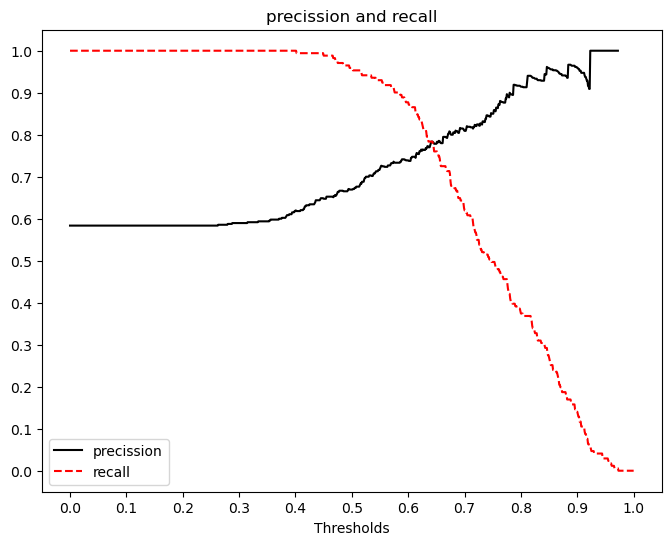

In [261]:
plt.figure(figsize=(8,6))

plt.plot(df_scores.threshold, df_scores.precission, color='black', linestyle='solid', label='precission')
plt.plot(df_scores.threshold, df_scores.recall, color='red', linestyle='dashed', label='recall')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('precission and recall')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

Q4

In [262]:
f1_thresholds = np.linspace(0, 1, 101)

In [263]:
thresholds = np.linspace(0, 1, 1001)
f1_df_scores = tpr_fpr_dataframe(y_val, y_pred, thresholds)

In [264]:
f1_df_scores['f1'] =  2 * ((df_scores.precission * df_scores.recall) / (df_scores.precission + df_scores.recall))

In [265]:
f1_df_scores.f1.max()

0.8153846153846154

In [266]:
f1_df_scores[545:565]

,threshold,tp,fp,fn,tn,tpr,fpr,precission,recall,f1
545,0.545,159,64,12,58,0.929825,0.524590,0.713004,0.929825,0.807107
546,0.546,159,64,12,58,0.929825,0.524590,0.713004,0.929825,0.807107
547,0.547,159,63,12,59,0.929825,0.516393,0.716216,0.929825,0.809160
548,0.548,159,63,12,59,0.929825,0.516393,0.716216,0.929825,0.809160
549,0.549,159,63,12,59,0.929825,0.516393,0.716216,0.929825,0.809160
550,0.550,159,62,12,60,0.929825,0.508197,0.719457,0.929825,0.811224
551,0.551,159,61,12,61,0.929825,0.500000,0.722727,0.929825,0.813299
552,0.552,159,60,12,62,0.929825,0.491803,0.726027,0.929825,0.815385
553,0.553,159,60,12,62,0.929825,0.491803,0.726027,0.929825,0.815385
554,0.554,158,60,13,62,0.923977,0.491803,0.724771,0.923977,0.812339


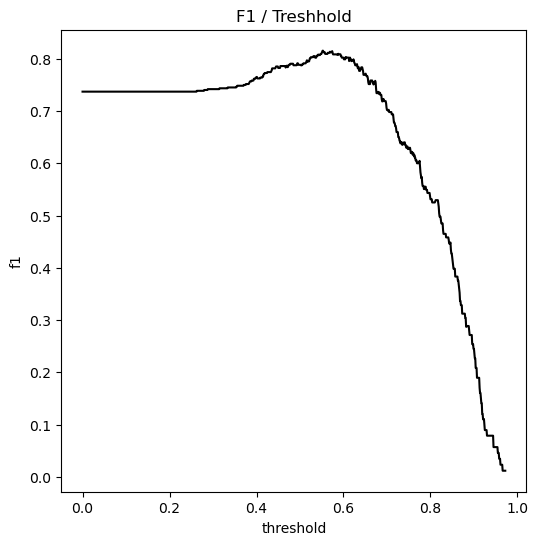

In [267]:
plt.figure(figsize=(6, 6))

plt.plot(f1_df_scores.threshold, f1_df_scores.f1, color='black', label='F1')


plt.title('F1 / Treshhold')

plt.xlabel('threshold')
plt.ylabel('f1')


plt.show()

Q5

In [268]:
KFold(n_splits=5, shuffle=True, random_state=1)

KFold(n_splits=5, random_state=1, shuffle=True)

In [269]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [270]:
from sklearn.model_selection import KFold

In [271]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [273]:
aucs = []
for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.converted.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [274]:
aucs

[0.8060745924216483,
 0.8713738368910783,
 0.7754320118852139,
 0.8018368617683685,
 0.8558272713202291]

In [275]:
np.array(aucs).round(3)

array([0.806, 0.871, 0.775, 0.802, 0.856])

In [276]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.822 ± 0.036


Q6

In [278]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model

In [280]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.000001, 0.001, 1]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))
    

C=1e-06, auc = 0.560 ± 0.024
C=0.001, auc = 0.867 ± 0.029
C=1, auc = 0.822 ± 0.036
